<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/MEF_subpopulation_gsea_for_immune_reponse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to look at the Geneset Enrichment analysis for cluster 1 and cluster 3 inflmmatory pathways

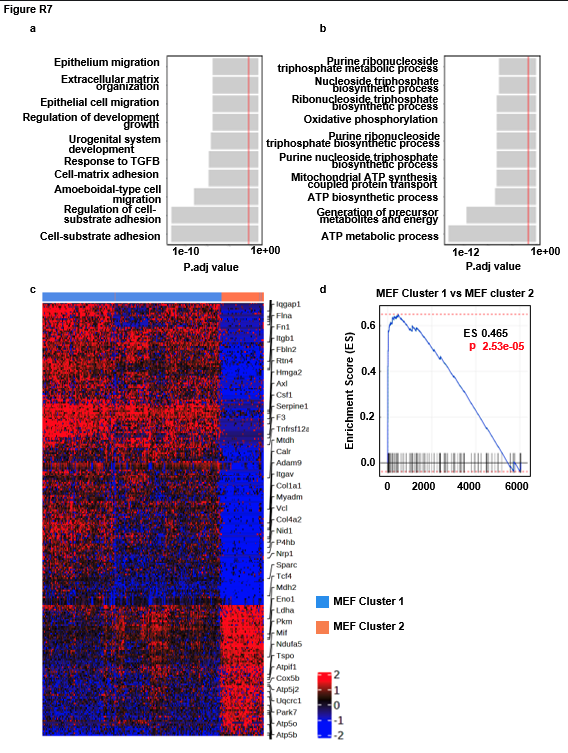

In [ ]:
start_time0 <- Sys.time()

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'SummarizedExperiment', 'rhdf5', 'SingleCellExperiment', 'limma', 'goseq', 
  'stringr', 'ggplot2', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db',
  'wordcloud', 'plotrix', 'DESeq2','fgsea','cowplot'
), Ncpus = 2)
install.packages(c('farver', "Seurat"), Ncpus = 2)
install.packages('devtools')
devtools::install_github('rstudio/reticulate')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'stringr' 'ggplot2'”
Installing package(s) 'BiocVersion', 'SummarizedExperiment', 'rhdf5',
  'SingleCellExperiment', 'limma', 'goseq',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'wordcloud', 'plotrix',
  'DESeq2', 'fgsea', 'cowplot'

also installing the dependencies ‘Rhtslib’, ‘rjson’, ‘filelock’, ‘formatR’, ‘zlibbioc’, ‘bitops’, ‘XML’, ‘Rsamtools’, ‘GenomicAlignments’, ‘restfulr’, ‘plogr’, ‘png’, ‘BiocFileCache’, ‘lambda.r’, ‘futile.options’, ‘xtable’, ‘matrixStats’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘rtracklayer’, ‘RSQLite’, ‘KEGGREST’, ‘Biostri


✔  checking for file ‘/tmp/RtmpiRNexS/remotes4e2a9ba7b8/rstudio-reticulate-277f410/DESCRIPTION’
─  preparing ‘reticulate’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘reticulate_1.22-9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github("jokergoo/ComplexHeatmap")

iterators    (NA -> 1.0.13) [CRAN]
foreach      (NA -> 1.5.1 ) [CRAN]
GlobalOpt... (NA -> 0.1.2 ) [CRAN]
shape        (NA -> 1.4.6 ) [CRAN]
doParallel   (NA -> 1.0.16) [CRAN]
clue         (NA -> 0.3-59) [CRAN]
GetoptLong   (NA -> 1.0.5 ) [CRAN]
circlize     (NA -> 0.4.13) [CRAN]


Installing 8 packages: iterators, foreach, GlobalOptions, shape, doParallel, clue, GetoptLong, circlize

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpiRNexS/remotes4e4266bd9b/jokergoo-ComplexHeatmap-a9d34f2/DESCRIPTION’
─  preparing ‘ComplexHeatmap’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘ComplexHeatmap_2.9.4.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github('YuLab-SMU/ChIPseeker')

enrichplot   (NA    -> d11b60bb6...) [GitHub]
openssl      (1.4.3 -> 1.4.5       ) [CRAN]
gridGraphics (NA    -> 0.5-1       ) [CRAN]
cpp11        (0.3.1 -> 0.4.0       ) [CRAN]
ggplotify    (NA    -> 0.1.0       ) [CRAN]
yulab.utils  (NA    -> 0.0.2       ) [CRAN]
treeio       (NA    -> 1.16.2      ) [CRAN]
tidytree     (NA    -> 0.3.5       ) [CRAN]
ggfun        (NA    -> 0.0.4       ) [CRAN]
aplot        (NA    -> 0.1.1       ) [CRAN]
ape          (NA    -> 5.5         ) [CRAN]
tweenr       (NA    -> 1.0.2       ) [CRAN]
ggforce      (NA    -> 0.3.3       ) [CRAN]
graphlayouts (NA    -> 0.7.1       ) [CRAN]
tidygraph    (NA    -> 1.2.0       ) [CRAN]
viridis      (NA    -> 0.6.1       ) [CRAN]
qvalue       (NA    -> 2.24.0      ) [CRAN]
GOSemSim     (NA    -> 2.18.1      ) [CRAN]
DO.db        (NA    -> 2.9         ) [CRAN]
ggtree       (NA    -> 3.0.4       ) [CRAN]
shadowtext   (NA    -> 0.0.9       ) [CRAN]
scatterpie   (NA    -> 0.1.7       ) [CRAN]
ggraph       (NA    -> 2.0.5  

cpp11        (0.3.1 -> 0.4.0 ) [CRAN]
tidytree     (NA    -> 0.3.5 ) [CRAN]
ape          (NA    -> 5.5   ) [CRAN]
gridGraphics (NA    -> 0.5-1 ) [CRAN]
yulab.utils  (NA    -> 0.0.2 ) [CRAN]
ggplotify    (NA    -> 0.1.0 ) [CRAN]
ggfun        (NA    -> 0.0.4 ) [CRAN]
openssl      (1.4.3 -> 1.4.5 ) [CRAN]
tweenr       (NA    -> 1.0.2 ) [CRAN]
treeio       (NA    -> 1.16.2) [CRAN]
aplot        (NA    -> 0.1.1 ) [CRAN]
ggforce      (NA    -> 0.3.3 ) [CRAN]
graphlayouts (NA    -> 0.7.1 ) [CRAN]
tidygraph    (NA    -> 1.2.0 ) [CRAN]
viridis      (NA    -> 0.6.1 ) [CRAN]
qvalue       (NA    -> 2.24.0) [CRAN]
GOSemSim     (NA    -> 2.18.1) [CRAN]
DO.db        (NA    -> 2.9   ) [CRAN]
ggtree       (NA    -> 3.0.4 ) [CRAN]
shadowtext   (NA    -> 0.0.9 ) [CRAN]
scatterpie   (NA    -> 0.1.7 ) [CRAN]
ggraph       (NA    -> 2.0.5 ) [CRAN]
DOSE         (NA    -> 3.18.2) [CRAN]


Installing 23 packages: cpp11, tidytree, ape, gridGraphics, yulab.utils, ggplotify, ggfun, openssl, tweenr, treeio, aplot, ggforce, graphlayouts, tidygraph, viridis, qvalue, GOSemSim, DO.db, ggtree, shadowtext, scatterpie, ggraph, DOSE

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpiRNexS/remotes4e535568b8/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’
─  preparing ‘enrichplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘enrichplot_1.13.1.992.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 24 packages: openssl, gridGraphics, cpp11, ggplotify, yulab.utils, treeio, tidytree, ggfun, aplot, ape, tweenr, ggforce, graphlayouts, tidygraph, viridis, qvalue, GOSemSim, DO.db, ggtree, shadowtext, scatterpie, ggraph, DOSE, TxDb.Hsapiens.UCSC.hg19.knownGene

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'enrichplot' from a github remote, the SHA1 (d11b60bb) has not changed since last install.
  Use `force = TRUE` to force installation



✔  checking for file ‘/tmp/RtmpiRNexS/remotes4e22b0c29c/YuLab-SMU-ChIPseeker-2e6f77c/DESCRIPTION’
─  preparing ‘ChIPseeker’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ChIPseeker_1.29.1.tar.gz’ (2.6s)
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ChIPseeker)



ChIPseeker v1.29.1  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383



In [ ]:
BiocManager::install('clusterProfiler')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'clusterProfiler'

also installing the dependency ‘downloader’


Old packages: 'cpp11', 'gert', 'openssl', 'rmarkdown', 'vroom', 'waldo',
  'lattice', 'nlme'



In [ ]:
library(clusterProfiler)

clusterProfiler v4.0.5  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141. doi: 10.1016/j.xinn.2021.100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




In [ ]:
BiocManager::install('SingleCellExperiment')
library(SingleCellExperiment)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'SingleCellExperiment'”
Old packages: 'cpp11', 'gert', 'openssl', 'rmarkdown', 'vroom', 'waldo',
  'lattice', 'nlme'

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRank

In [ ]:
BiocManager::install('ggsci')
library(ggsci)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'ggsci'

Old packages: 'cpp11', 'gert', 'openssl', 'rmarkdown', 'vroom', 'waldo',
  'lattice', 'nlme'



In [ ]:
library(SummarizedExperiment)
library(RColorBrewer)
library(plyr)
library(dplyr)
library(parallel)
library(ggplot2)
library(goseq)
library(stringr)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(wordcloud)
library(plotrix)
library(DESeq2)
library(fgsea)
library(cowplot)
library(Seurat)


Attaching package: ‘plyr’


The following object is masked from ‘package:IRanges’:

    desc


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:clusterProfiler’:

    arrange, mutate, rename, summarise


The following object is masked from ‘package:ChIPseeker’:

    .



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

   

In [ ]:
library(tidyverse)
library(magrittr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.4     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   2.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()        masks plyr::arrange(), clusterProfiler::arrange()
✖ dplyr::collapse()       masks IRanges::collapse()
✖ dplyr::combine()        masks Biobase::combine(), BiocGenerics::combine()
✖ purrr::compact()        masks plyr::compact()
✖ dplyr::count()          masks plyr::count(), matrixStats::count()
✖ dplyr::desc()           masks plyr::desc(), IRanges::desc()
✖ tidyr::expand()         masks S4Vectors::expand()
✖ dplyr::failwith()       masks plyr::failwith()
✖ dplyr::filter()         masks clusterProfiler::filter(), stats::filter()
✖ dplyr::first()          masks S4Vectors::first()
✖ dplyr::id()             masks 

In [ ]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.9.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




## Load processed scRNA-seq data

In [ ]:
se_file <- c(
  "sce" = "https://s3.msi.umn.edu/gongx030/etv2_pioneer/data/processed_Etv2_scRNAseq.rds")

In [ ]:
for (i in 1:length(se_file)){
  sprintf('wget -x -c -nH %s', se_file[i]) %>% system()
}
se_file <- gsub('https://s3.msi.umn.edu/', './', se_file)
message(sprintf('all se_file exist: %s', all(file.exists(se_file))))

all se_file exist: TRUE



In [ ]:
se <- lapply(se_file, function(s){s %>%
  readRDS()})

In [ ]:
sce <- se$sce


## Determine the number of clusters by running k-means on the scVI latent space

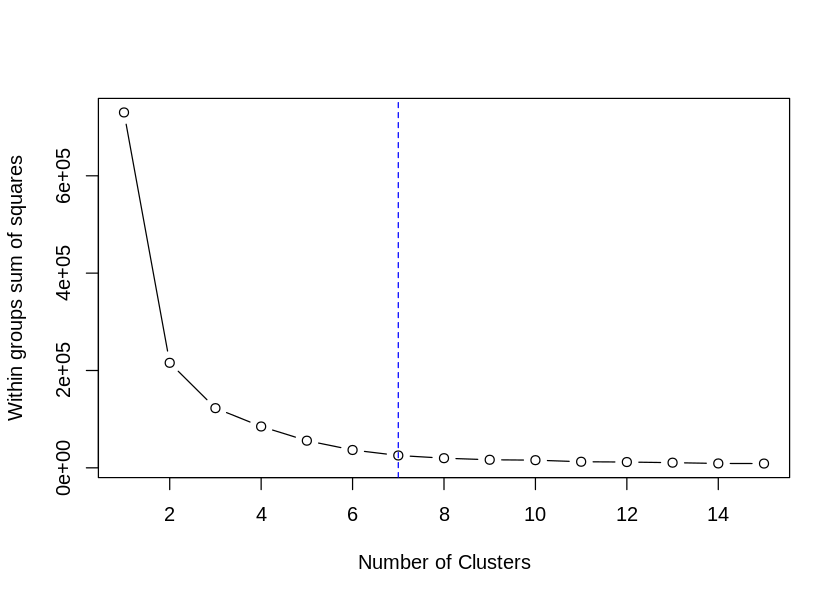

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)
wss <- (nrow(colData(sce)$umap)-1) * sum(apply(colData(sce)$umap, 2, var))
for (i in 2:15) wss[i] <- sum(kmeans(colData(sce)$umap,centers = i, nstart = 10)$withinss)
options(repr.plot.width=7, repr.plot.height=5)
plot(1:15, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")
n_cluster <- 7
abline(v = n_cluster, col = 'blue', lty = 2)

In [ ]:
set.seed(1)
# it is important to set nstart to a large number to get a relatively robust clustering result. 
cls <- kmeans(colData(sce)$umap, n_cluster, nstart = 100)$cluster
table(cls, colData(sce)$group)
cls <- as.numeric(factor(cls, c(4, 5, 2, 3, 1, 7, 6)))
table(cls, colData(sce)$group)

   
cls MEF_NoDox MEF_Dox_D1 MEF_Dox_D2 MEF_Dox_D7a MEF_Dox_D7b
  1         1          0         17        1493           3
  2         0          6       1443           1           0
  3         0          4       1435          23           0
  4      2878        541         21           2           3
  5       657        381          1           0           0
  6         0          2          0           1         813
  7        26         14         19        5682           8

   
cls MEF_NoDox MEF_Dox_D1 MEF_Dox_D2 MEF_Dox_D7a MEF_Dox_D7b
  1      2878        541         21           2           3
  2       657        381          1           0           0
  3         0          6       1443           1           0
  4         0          4       1435          23           0
  5         1          0         17        1493           3
  6        26         14         19        5682           8
  7         0          2          0           1         813

In [ ]:
colData(sce)$cluster <- cls #Adding cluster information to colData(sce)

# New column joining group and cluster to later find markers only for MEF_NoDox in cluster 1 and 2

In [ ]:
colData(sce)$condition <- paste(colData(sce)$group, colData(sce)$cluster, sep = '_')

In [ ]:
colData(sce)

DataFrame with 15475 rows and 8 columns
                barcodes       group doublet_scores predicted_doublets
             <character>    <factor>      <numeric>          <logical>
1     AAACCTGTCTGTCTAT-1  MEF_Dox_D1      0.1233766              FALSE
2     AAACGGGGTAAACACA-1  MEF_Dox_D1      0.0725995              FALSE
3     AAACGGGTCGCGTAGC-1  MEF_Dox_D1      0.0780488              FALSE
4     AAAGATGGTCACCCAG-1  MEF_Dox_D1      0.0507812              FALSE
5     AAAGCAAAGAGCTATA-1  MEF_Dox_D1      0.2380952              FALSE
...                  ...         ...            ...                ...
15471 TTTATGCCATCCTAGA-1 MEF_Dox_D7b      0.1951220              FALSE
15472 TTTCCTCTCGTACCGG-1 MEF_Dox_D7b      0.0257104              FALSE
15473 TTTGGTTCATCTCGCT-1 MEF_Dox_D7b      0.0977444              FALSE
15474 TTTGGTTTCGTAGATC-1 MEF_Dox_D7b      0.1401274              FALSE
15475 TTTGGTTTCGTGGGAA-1 MEF_Dox_D7b      0.1951220              FALSE
                                  lat

# Converting Summarized experiment into a Seurat Objest

In [ ]:
sce = as(sce, "SingleCellExperiment")
print(sce)
rownames(sce) = rowData(sce)$name
colnames(sce)  = colData(sce)$barcodes
so = as.Seurat(sce, data = NULL)
so = CreateSeuratObject(counts = GetAssayData(so, slot = "counts"), meta.data = so@meta.data)
so[["percent.mt"]] = PercentageFeatureSet(so, pattern = "^mt-")
so[["percent.rpl"]] = PercentageFeatureSet(so, pattern = "^Rpl")
so[["percent.rps"]] = PercentageFeatureSet(so, pattern = "^Rps")
s.genes <- cc.genes$s.genes %>% str_to_title()
g2m.genes <- cc.genes$g2m.genes %>% str_to_title()
so <- CellCycleScoring(so, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
rownames(sce) = rownames(so)
colnames(sce) = colnames(so)
so <- SetAssayData(object = so, slot = "scale.data", new.data = assays(sce)$scaled_counts) #Scaling
so <- SetAssayData(object = so, slot = "data", new.data = assays(sce)$normalized_counts) #Normalizing
so[["umap"]] <- CreateDimReducObject(embeddings = as.matrix(so@meta.data[,c("umap.V1", "umap.V2")]), key = "umap_", assay = DefaultAssay(so)) #assign UMAP calculated 
so

class: SingleCellExperiment 
dim: 17010 15475 
metadata(1): curves
assays(3): counts normalized_counts scaled_counts
rownames: NULL
rowData names(6): id name ... is_hvg clusters
colnames: NULL
colData names(8): barcodes group ... cluster condition
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Warning message:
“The following features are not present in the object: Mlf1ip, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Fam64a, Hn1, not searching for symbol synonyms”


An object of class Seurat 
17010 features across 15475 samples within 1 assay 
Active assay: RNA (17010 features, 0 variable features)
 1 dimensional reduction calculated: umap

In [ ]:
gene_list <- c(
  "nfkb" = "https://s3.msi.umn.edu/dsouz072/datasets/dataset=etv2_pioneer=20210404a/Nf_kB.tsv",
  "hdac" = "https://s3.msi.umn.edu/dsouz072/datasets/dataset=etv2_pioneer=20210404a/HDAC_complex.tsv",
  "hat" = "https://s3.msi.umn.edu/dsouz072/datasets/dataset=etv2_pioneer=20210404a/Hat.tsv",
  "inflammatory" = "https://s3.msi.umn.edu/dsouz072/datasets/dataset=etv2_pioneer=20210404a/Inflammatory_go.tsv")

In [ ]:
for (i in 1:length(gene_list)){
  sprintf('wget -x -c -nH %s', gene_list[i]) %>% system()
}
gene_list <- gsub('https://s3.msi.umn.edu/', './', gene_list)
message(sprintf('all gene_list exist: %s', all(file.exists(gene_list))))

all gene_list exist: TRUE



In [ ]:
genes <- lapply(gene_list, function(g){read.table(g, header = TRUE, sep = '\t')})

In [ ]:
gene_sets <- lapply(genes, function(x){x$SYMBOL})
names(gene_sets) <- names(genes)

# Finding differntially expressed genes between cluster 1 & 2 MEF_NoDox

In [ ]:
Idents(so) <- 'condition'

In [ ]:
Clust1_2 = FindMarkers(so, ident.1 = 'MEF_NoDox_1', ident.2 = 'MEF_NoDox_2',test.use = "wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1)
Clust2_1 = FindMarkers(so, ident.1 = 'MEF_NoDox_2', ident.2 = 'MEF_NoDox_1', test.use = "wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1)

In [ ]:
head(Clust1_2)
head(Clust2_1)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fn1,0.000000e+00,3.065210,0.993,0.207,0.000000e+00
Col1a2,0.000000e+00,3.297850,0.993,0.169,0.000000e+00
Fbln2,0.000000e+00,2.675652,0.991,0.167,0.000000e+00
Ahnak,5.240810e-306,2.450298,0.987,0.224,8.914618e-302
Sparc,5.537022e-287,2.187408,0.982,0.205,9.418474e-283
Ckap4,5.611045e-287,1.779178,0.952,0.085,9.544387e-283


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lgals1,0.000000e+00,1.342993,1.000,1.000,0.000000e+00
Ubb,9.457933e-307,1.848015,1.000,0.994,1.608794e-302
S100a11,4.229608e-295,1.830384,1.000,0.991,7.194563e-291
Eno1,2.707022e-284,1.910912,0.988,0.950,4.604645e-280
Aldoa,9.874760e-274,1.843351,0.980,0.920,1.679697e-269
Pkm,1.122131e-262,1.868455,0.992,0.979,1.908745e-258


## Upregulated genes in cluster 1 and cluster 2

In [ ]:
# Cluster 1
up_1 <- Clust1_2 %>% 
        filter(p_val_adj < 0.05) %>%
        filter(avg_log2FC > 1)
# Cluster 2
up_2 <- Clust2_1 %>% 
        filter(p_val_adj < 0.05) %>%
        filter(avg_log2FC > 1)

In [ ]:
dim(up_1)

[1] 174   5

In [ ]:
dim(up_2)

[1] 75  5

In [ ]:
fc <- c(Clust1_2$avg_log2FC, -(Clust2_1$avg_log2FC))

In [ ]:
names(fc) <- c(rownames(Clust1_2), rownames(Clust2_1))

In [ ]:
range(Clust2_1$avg_log2FC)

[1] 0.1001781 1.9109122

In [ ]:
fc <- na.omit(fc)
fc <- sort(fc, decreasing = TRUE)

In [ ]:
length(fc)

[1] 6053

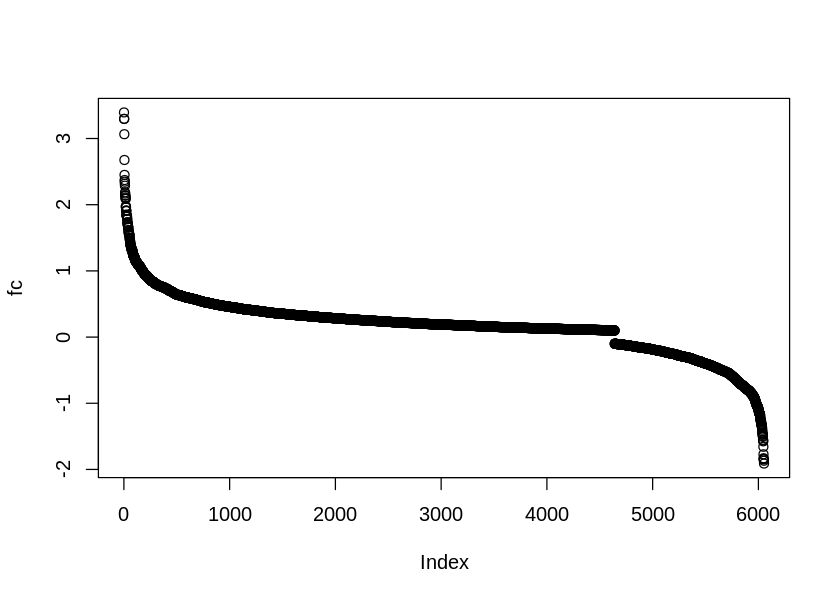

In [ ]:
plot(fc)

In [ ]:
set.seed(1)
fgseaRes <-  fgseaMultilevel(pathways = gene_sets, 
                  stats    = fc,
                  minSize  = 5,
                  maxSize  = 2000,
                  nPermSimple = 5000)

In [ ]:
ep <- lapply(names(genes), function(x){plotEnrichment(gene_sets[[x]],
               fc) + labs(title=sprintf('%s: p-value %f',fgseaRes[grepl(x, fgseaRes$pathway),]$pathway, fgseaRes[grepl(x, fgseaRes$pathway),]$pval)) +geom_line(color = 'blue')
  })

In [ ]:
fgseaRes

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
hat,3.712476e-01,0.4949967869,0.03359141,0.3490092,1.0842030,23,"Crebbp, Phf14 , Taf10 , Usp22 , Kat7 , Ep300 , Atf2 , Naa50 , Taf1 , Clock , Kat6a , Gtf3c4, Brpf1 , Naa40 , Epc2 , Ncoa3 , Epc1"
hdac,7.195674e-01,0.7195674044,0.01764630,0.2291626,0.8335097,48,"Ncor1 , Tbl1x , Chd4 , Mbd2 , Gatad2a, Gatad2b, Zbtb7a , Cbx5 , Hdac7 , Mta2 , Jmjd1c , Csnk2a1, Rcor1 , Brd8 , Trrap , Mecom , Ep400 , Nrip1 , Mta1"
inflammatory,2.534753e-05,0.0001013901,0.57561026,0.4649060,1.9088349,101,"Thbs1 , Fn1 , Ptgs2 , Csf1 , Cd44 , Itgav , Rtn4 , Axl , Ywhaz , Ddx3x , Hnrnpa0, F3 , Igfbp4 , Ptn , F2r , Ext1 , Gja1 , Timp1 , Vcam1 , Hmox1 , Rbpj , Dhx9 , Hmgb2"
nfkb,3.431373e-01,0.4949967869,0.03651784,0.4032401,1.1108307,14,"Zfp91 , Irak1 , Akt1 , Dicer1, Map3k7, Irak2 , Chuk , Traf4"


In [ ]:
names(ep) <- names(genes)

In [ ]:
gene_sets

$nfkb
 [1] "Irak1"   "Card10"  "Chuk"    "Dicer1"  "Tirap"   "Ikbkg"   "Agt"    
 [8] "Rel"     "Mas1"    "Akt1"    "Akt1"    "Traf2"   "Traf2"   "Traf2"  
[15] "Card10"  "Card10"  "Traf6"   "Traf6"   "Ppp4c"   "Ppp4c"   "Rela"   
[22] "Relb"    "Relb"    "Malt1"   "Malt1"   "Traf2"   "Traf2"   "Tnfsf15"
[29] "Chuk"    "Chi3l1"  "Traf4"   "Irak1"   "Zfp91"   "Zfp91"   "Traf2"  
[36] "Traf2"   "Irak2"   "Dicer1"  "Cops8"   "Cops8"   "Map3k7"  "Tirap"  
[43] "Tlr1"    "Tlr4"    "Ripk3"   "Ripk3"   "Ikbke"   "Ikbke"   "Ikbke"  
[50] "Ikbke"   "Ikbke"   "Ikbke"   "Nfkb2"   "Map3k14" "Map3k14"

$hdac
  [1] "Srcap"     "Srcap"     "Gm42715"   "Morf4l1"   "Srcap"     "Morf4l1"  
  [7] "Srcap"     "Srcap"     "Hdac4"     "Srcap"     "Hdac2"     "Hdac2"    
 [13] "Hdac9"     "Gm42715"   "Hdac9"     "Hdac9"     "Hdac9"     "Hdac9"    
 [19] "Hdac9"     "Hdac9"     "Hdac9"     "Hdac9"     "Hdac9"     "Hdac9"    
 [25] "Hdac9"     "Hdac9"     "Hdac9"     "Mideas"    "Chd3"      "Chd3"     
 [31] "Hdac9"     "Hdac9"     "Chd5"      "Hdac5"     "Hdac5"     "Chd3"     
 [37] "Chd3"      "Chd3"      "Chd3"      "Chd3"      "Chd3"      "Chd3"     
 [43] "Hdac5"     "Hdac5"     "Hdac5"     "Hdac5"     "Hdac5"     "Hdac5"    
 [49] "Mbd3"      "Mbd3"      "Brd8"      "Brd8"      "Brd8"      "Hdac7"    
 [55] "Hdac7"     "Sin3a"     "Hdac7"     "Hdac7"     "Hdac7"     "Hdac7"    
 [61] "Hdac7"     "Mideas"    "Chd3"      "Chd3"      "Srcap"     "Mbd2"     
 [67] "Chd3"      "Chd3"      "Mbd3"      "Chd3"      "Chd3"      "Mta1"     
 [73] "Hdac1"     "Hdac1"     "Hdac1"     "Hdac1"     "Hdac1"     "Hdac1"    
 [79] "Hdac1"     "Hdac1"     "Hdac1"     "Hdac1"     "Hdac1"     "Chd3"     
 [85] "Chd3"      "Chd3"      "Chd3"      "Sap18"     "Sap30"     "Sap30"    
 [91] "Sap30"     "Sap30"     "Hdac3"     "Hdac3"     "Hdac3"     "Zbtb7a"   
 [97] "Zbtb7a"    "Zbtb7a"    "Mecom"     "Mecom"     "Tal1"      "Tal1"     
[103] "Ruvbl1"    "Ruvbl1"    "Ruvbl1"    "Ruvbl1"    "Morf4l1"   "Morf4l1"  
[109] "Morf4l1"   "Hdac2"     "Hdac2"     "Hdac2"     "Hdac2"     "Hint1"    
[115] "Hint1"     "Anp32e"    "Anp32e"    "Znf541"    "Znf541"    "Hey2"     
[121] "Dnttip1"   "Hdac5"     "Ruvbl2"    "Tal1"      "Mta2"      "Zfp217"   
[127] "Zfp217"    "Ruvbl1"    "Brms1l"    "Mideas"    "Hdac5"     "Hdac5"    
[133] "Srcap"     "Morf4l1"   "Morf4l1"   "Mta2"      "Morf4l1"   "Hdac5"    
[139] "Hdac5"     "Kat5"      "Hdac3"     "Sin3a"     "Hdac11"    "Morf4l1"  
[145] "Hdac1"     "Hdac1"     "Morf4l1"   "Ncor1"     "Ncor1"     "Phf12"    
[151] "Phf12"     "Sap30l"    "Sap30l"    "Sap30l"    "Sin3a"     "Sin3a"    
[157] "Sin3a"     "Sin3a"     "Sin3a"     "Csnk2a1"   "Csnk2a1"   "Rbbp4"    
[163] "Rbbp4"     "Rbbp4"     "Rbbp7"     "Rbbp7"     "Rbbp7"     "Rbbp7"    
[169] "Ncor1"     "Ncor1"     "Ncor1"     "Hr"        "Hr"        "Cbx5"     
[175] "Sin3b"     "Sin3b"     "Jmjd1c"    "mFLJ00062" "Hdac4"     "Hdac4"    
[181] "Hdac4"     "Hdac10"    "Hdac10"    "Hdac10"    "Hdac5"     "Hdac5"    
[187] "Kdm3a"     "Chd4"      "Chd4"      "Rcor3"     "Phf21a"    "Phf21a"   
[193] "Kdm3b"     "Chd3"      "Chd3"      "Hdac5"     "Rere"      "Trrap"    
[199] "Trrap"     "Zfp217"    "Tbl1xr1"   "Tbl1xr1"   "Sap130"    "Srcap"    
[205] "Srcap"     "Suds3"     "Suds3"     "Chd3"      "Chd3"      "Srcap"    
[211] "Mideas"    "Srcap"     "Trerf1"    "Hdac7"     "Hdac7"     "Rcor2"    
[217] "Sinhcaf"   "Sinhcaf"   "Sinhcaf"   "Nrip1"     "Rcor1"     "Ep400"    
[223] "Ep400"     "Ep400"     "Kat5"      "Kat5"      "Kat5"      "Gatad2a"  
[229] "Gatad2a"   "Gatad2a"   "Chd3"      "Chd3"      "Mta1"      "Mta1"     
[235] "Mta1"      "Mta1"      "Znhit1"    "Brd8"      "Brd8"      "Brd8"     
[241] "Ing3"      "Ing3"      "Ing3"      "Hdac8"     "Hdac8"     "Gatad2b"  
[247] "Satb2"     "Hdac11"    "Hdac11"    "Hdac11"    "Arhgef10l" "Mta3"     
[253] "Mta3"      "Mta3"      "Dnttip1"   "Dnttip1"   "Dnttip1"   "Hdac9"    
[259] "Hdac9"     "Brms1"     "Actr6"     "

# GSEA plot

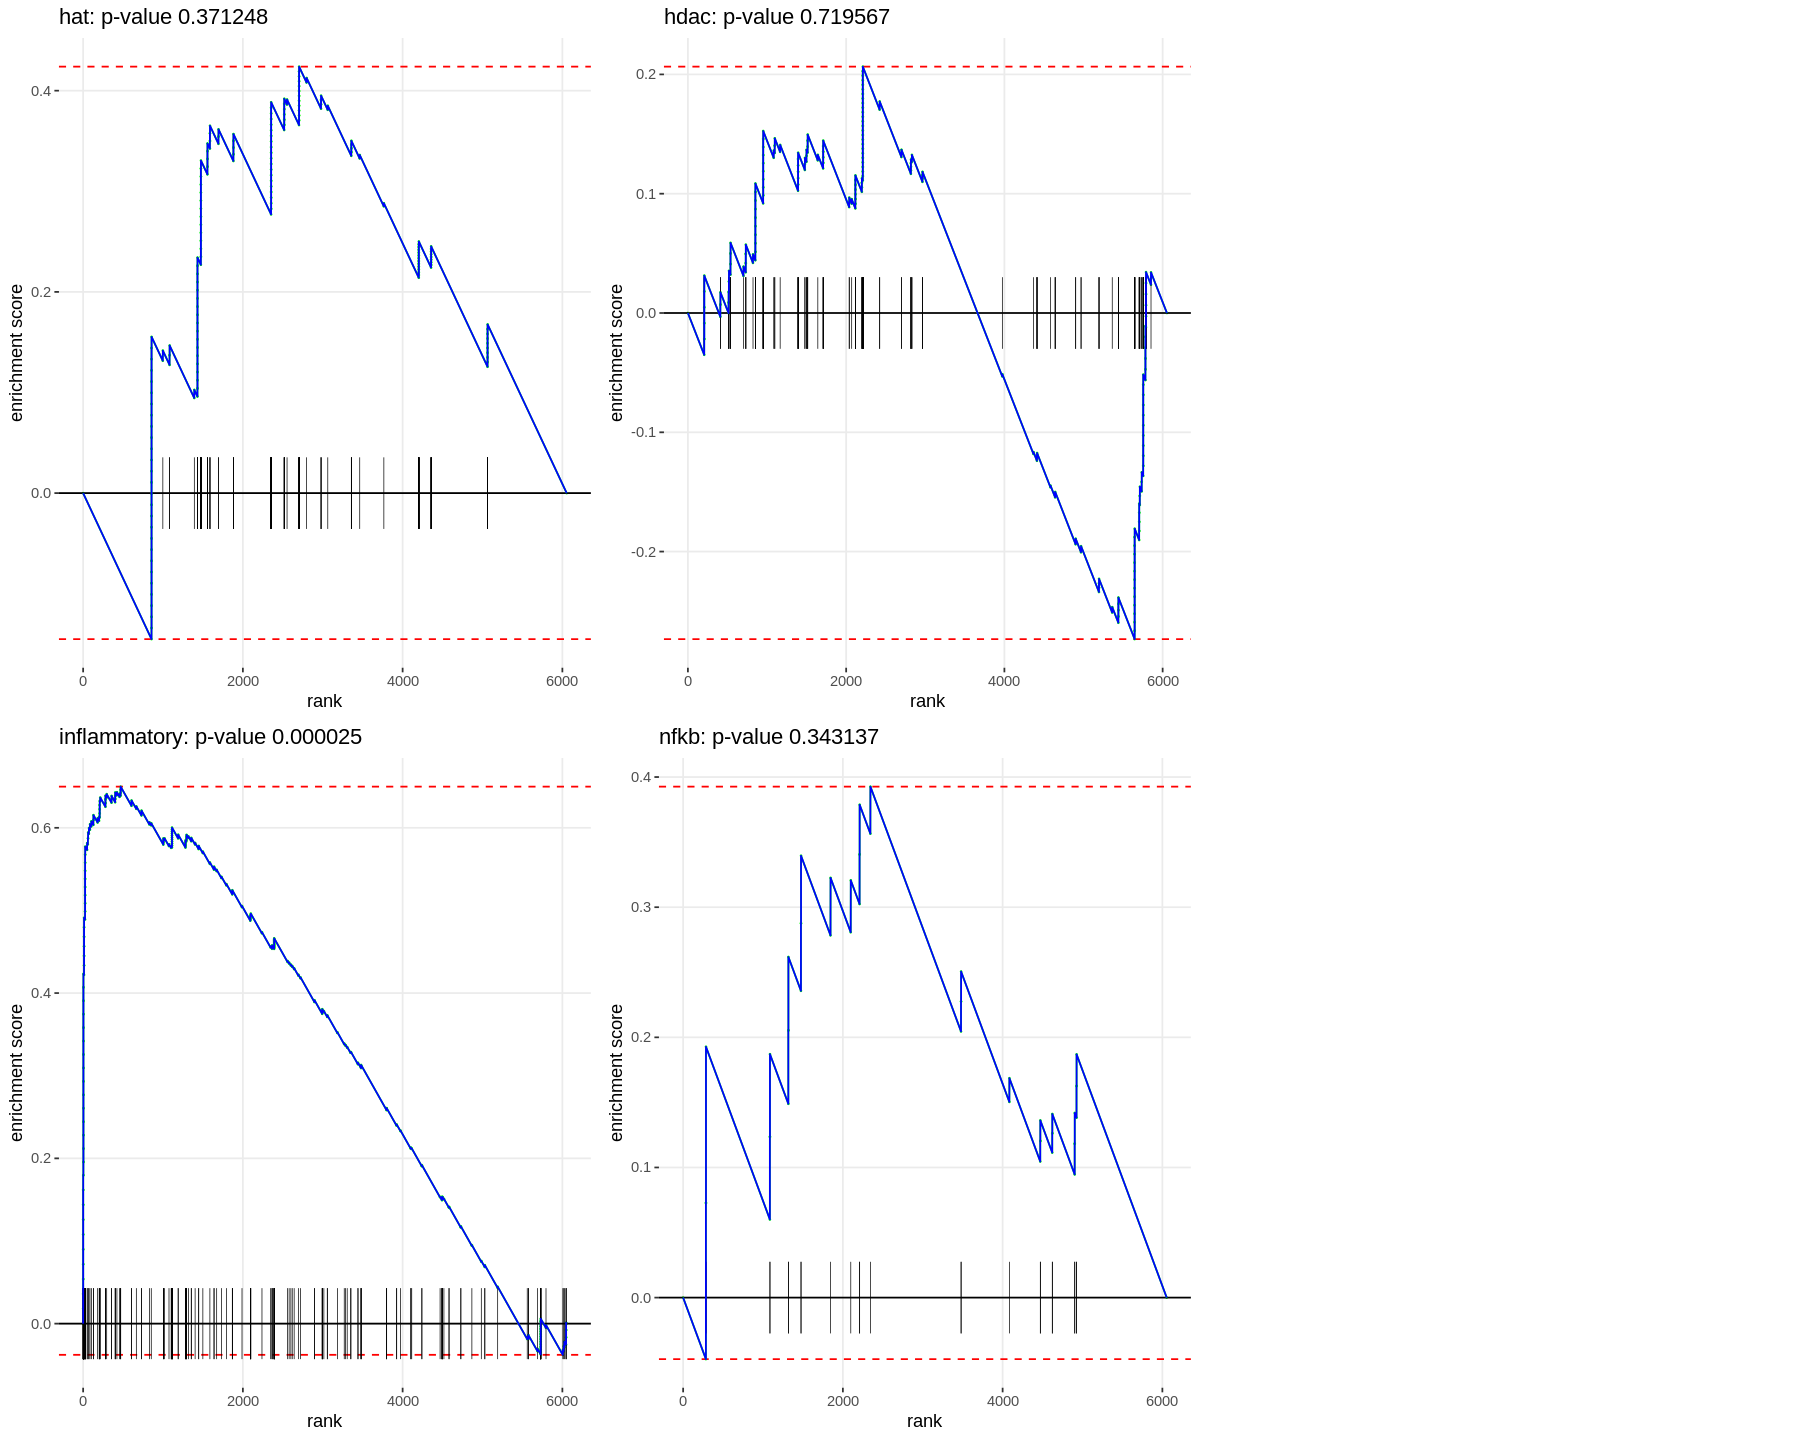

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 12)
plot_grid(ep[['hat']], ep[['hdac']], ep[['hdac_sub']], ep[['inflammatory']], ep[['nfkb']])

Inflammatory reponse pathway is significantly upregulated in MEF cluster 1

In [ ]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ComplexHeatmap_2.9.4                     
 [2] magrittr_2.0.1                           
 [3] forcats_0.5.1                            
 [4] purrr_0.3.4                              
 [5] readr_2.0.1                              